# Data Preparation

## Import Dataset

In [1]:
# Default
from google.colab import files
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Putriarrum/Investigate-Hotel-Business-Bukalapak/main/hotel_bookings_data.csv', delimiter=',')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
1720,Resort Hotel,0,338,2017,November,37,10,2,8,2,...,0,No Deposit,156.0,NaN,0,Contract,66.15,0,1,Check-Out
111207,City Hotel,0,106,2019,July,18,4,1,3,2,...,0,No Deposit,7.0,NaN,0,Personal,97.02,0,1,Check-Out
71840,City Hotel,1,139,2019,September,28,13,1,3,3,...,0,No Deposit,9.0,NaN,0,Personal,152.10,0,0,Canceled
3012,Resort Hotel,0,53,2017,January,46,11,0,4,1,...,1,No Deposit,240.0,NaN,0,Personal,85.50,1,1,Check-Out
1268,Resort Hotel,1,87,2017,October,34,22,0,1,2,...,0,No Deposit,240.0,NaN,0,Personal,164.00,0,0,Canceled


## Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Checking Unique Values Every Column

In [4]:
for i in df:
    print(i)
    print(df[i].unique(), '\n')

hotel
['Resort Hotel' 'City Hotel'] 

is_canceled
[0 1] 

lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235

1. Dataset terdiri dari 29 columns dan 119390 rows data
2. Variasi tipe data yang ada pada dataset adalah int64, object, float64
3. Terdapat beberapa kolom yang memiliki nilai null:
    *   children
    *   city
    *   agent
    *   company
4. Terdapat beberapa tipe data yang perlu disesuaikan seperti children, agent, company(float64 -> int64), selebihnya type data sudah tidak mengalami masalah.
5. Terdapat values yang perlu disesuaikan, seperti:
    *   children (0, Nan diubah menjadi 0)




### Checking Missing Value

#### Checking Null Value

In [5]:
# Find Null Values
counts = df.isna().sum().sort_values(ascending = False)

# Percentage Null Values
percents = round(df.isna().mean() * 100, 2).sort_values(ascending = False)

null = pd.concat([counts, percents], axis = 1, keys = ['null_counts', '%'])
null

,null_counts,%
company,112593,94.31
agent,16340,13.69
city,488,0.41
children,4,0.00
hotel,0,0.00
is_repeated_guest,0,0.00
total_of_special_requests,0,0.00
required_car_parking_spaces,0,0.00
adr,0,0.00
customer_type,0,0.00


In [ ]:
# Percentage rows containing missing values
df_nan = df[df.isna().any(axis = 1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df) * 100, 2)} %')

Persentase missing value pada dataset : 99.82 %


Key Takeaways

Presentase nilai Null pada dateset ada **lebih dari 99%**, karena nilainya > 10% maka **tidak dilakukan drop nilai Null**

#### Merging Column Same Value

In [ ]:
df['children'].replace(['0', 'nan'], 0, inplace=True)

Summary
1. Pada column children terdapat value 0 dan nan sama dengan 0 maka untuk value tersebut di lakukan perubahan menjadi 0.


### Checking Duplicated Data

In [6]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [8]:
df.duplicated().sum()

33261

Key Takeaway
Duplikat data akan dihapus dan menyisakan satu unique value

### Statistical Descriptive

#### Data Split

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'bookings_number'],
      dtype='object')

In [11]:
num = ['lead_time', 'arrival_date_week_number', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_weekdays_nights',
       'adults', 'children', 'babies', 'is_repeated_guest','previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'is_canceled',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',]

cat = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']

#### Numarical Features

In [9]:
# Statistic Numerical Data
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


Summary:

Fitur adr, **Averange Daily Rate** (room revenue/number of room sold) terdapat **value negatif**. Hal itu merupakan **anomali dan perlu didrop**.

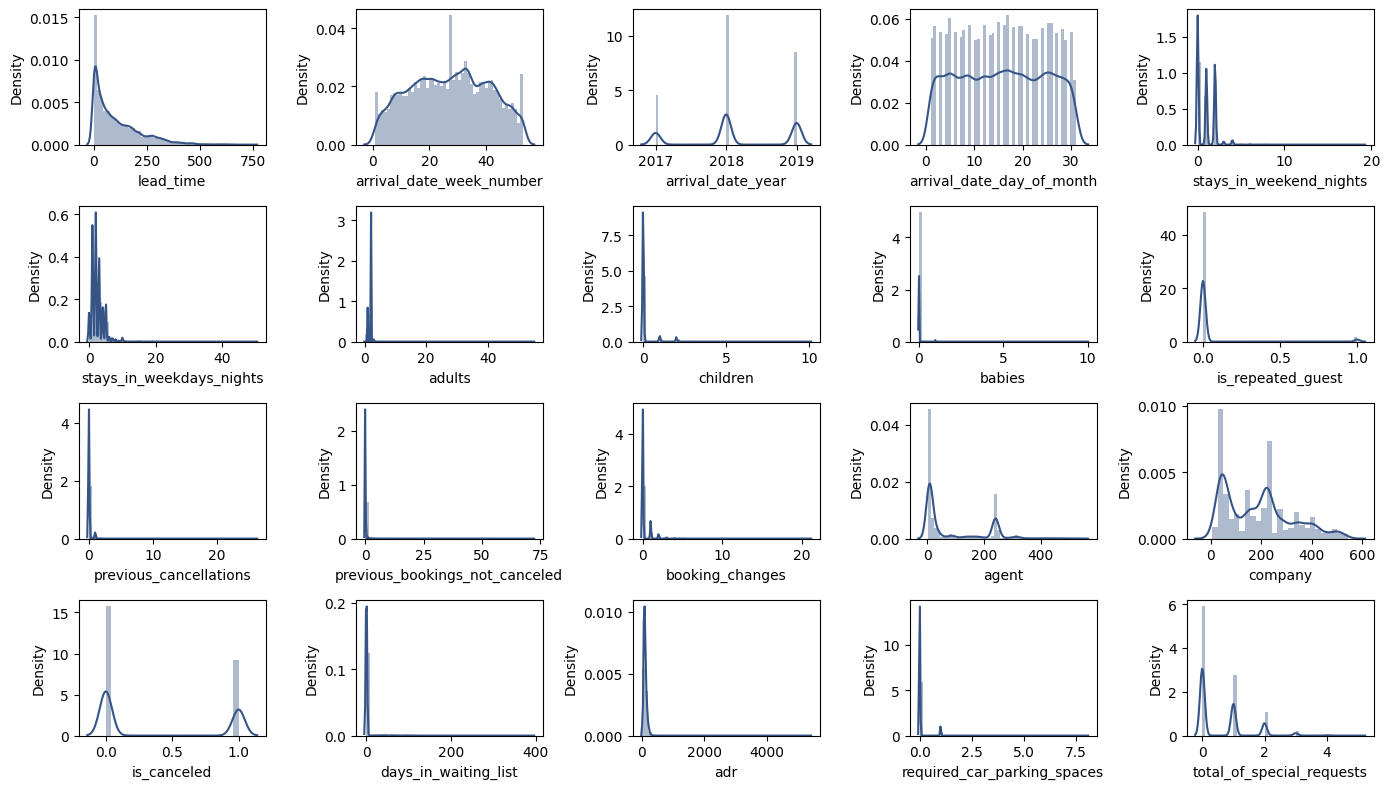

In [13]:
# Distribution Checking

plt.figure(figsize = (14, 8))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[num[i]], color = '#365486')
    plt.tight_layout()

Key Takeaways:

* Secara keseluruhan fitur c**enderung positively skewed**
* **arrival_date_week_number dan arrival_date_day_of_month** memiliki distribusi cenderung **normal**

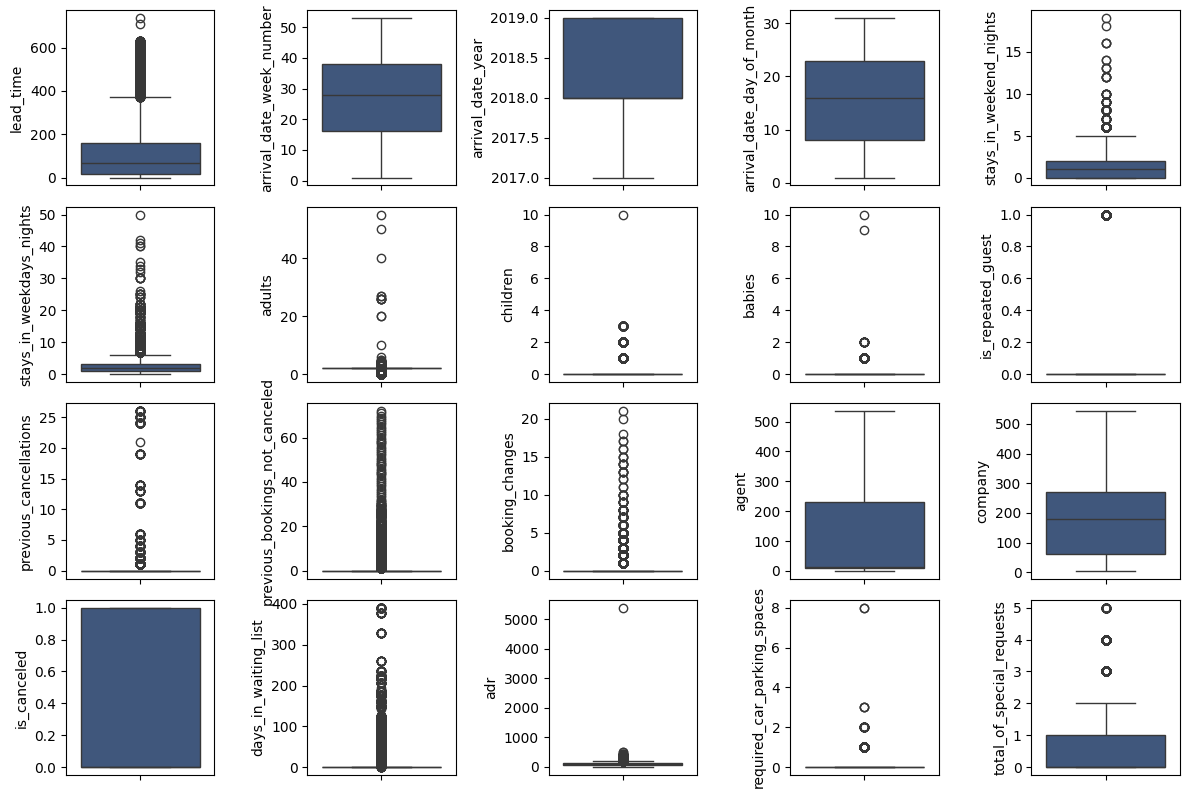

In [12]:
# Distribution and Outlier Checking with Boxplot Numerical Features

plt.figure(figsize = (12, 8))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y = df[num[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

Key Takeaways:

*   Secara keseluruhan, fitur **mayoritas memiliki outlier**
*   Terlihat **nilai ekstrim pada fitur adr, required_car_parking_spaces, children, adults, dan babies**
*   **Handling outlier** akan dilakukan **menghilangkan nilai ekstrim saja**, agar tidak mengurangi insight yang dihasilkan





Mengecek data anomali tamu = 0 atau tedapat kamar yang dibooking namun tidak ada tamu yang menginap

In [14]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

Key takeaways:

* Terdapat **180 kamar tidak memiliki tamu**
* Data ini nantinya akan di **drop**


#### Categorical Features

In [16]:
# Statistic Categorical Data
df[cat].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


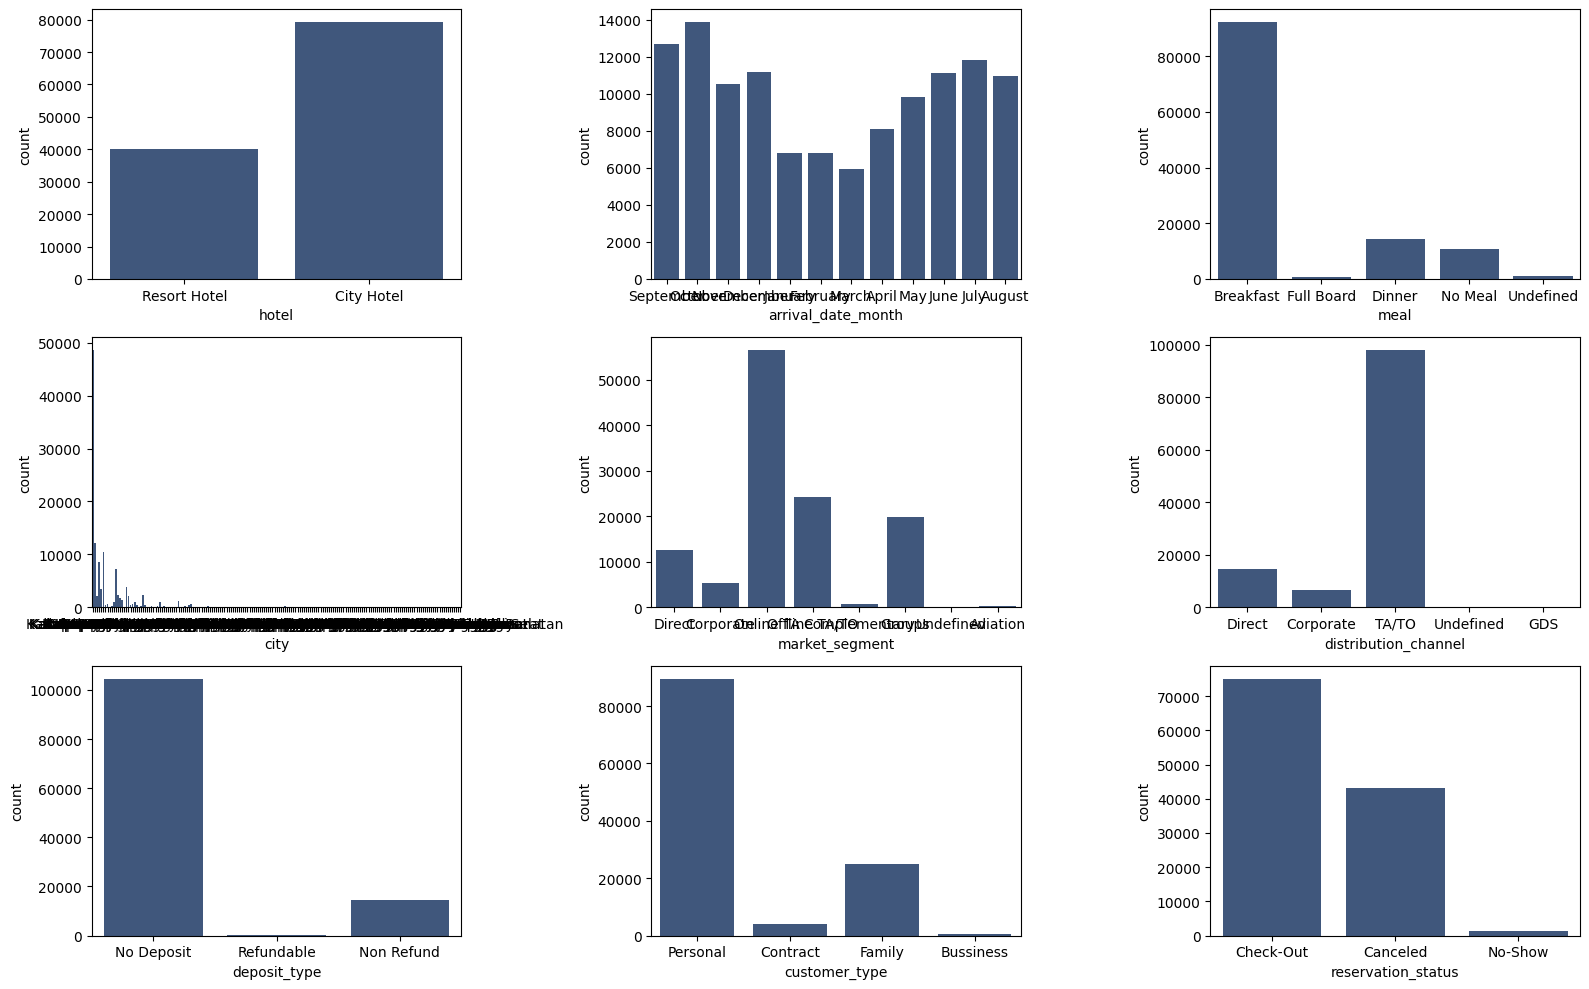

In [20]:
# Distribution Categorical Features

plt.figure(figsize = (16, 10))
for i in range(0, len(cat)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cat[i]], color = '#365486', orient = 'v')
    plt.tight_layout()

### Multivariate Analysis

<Axes: >

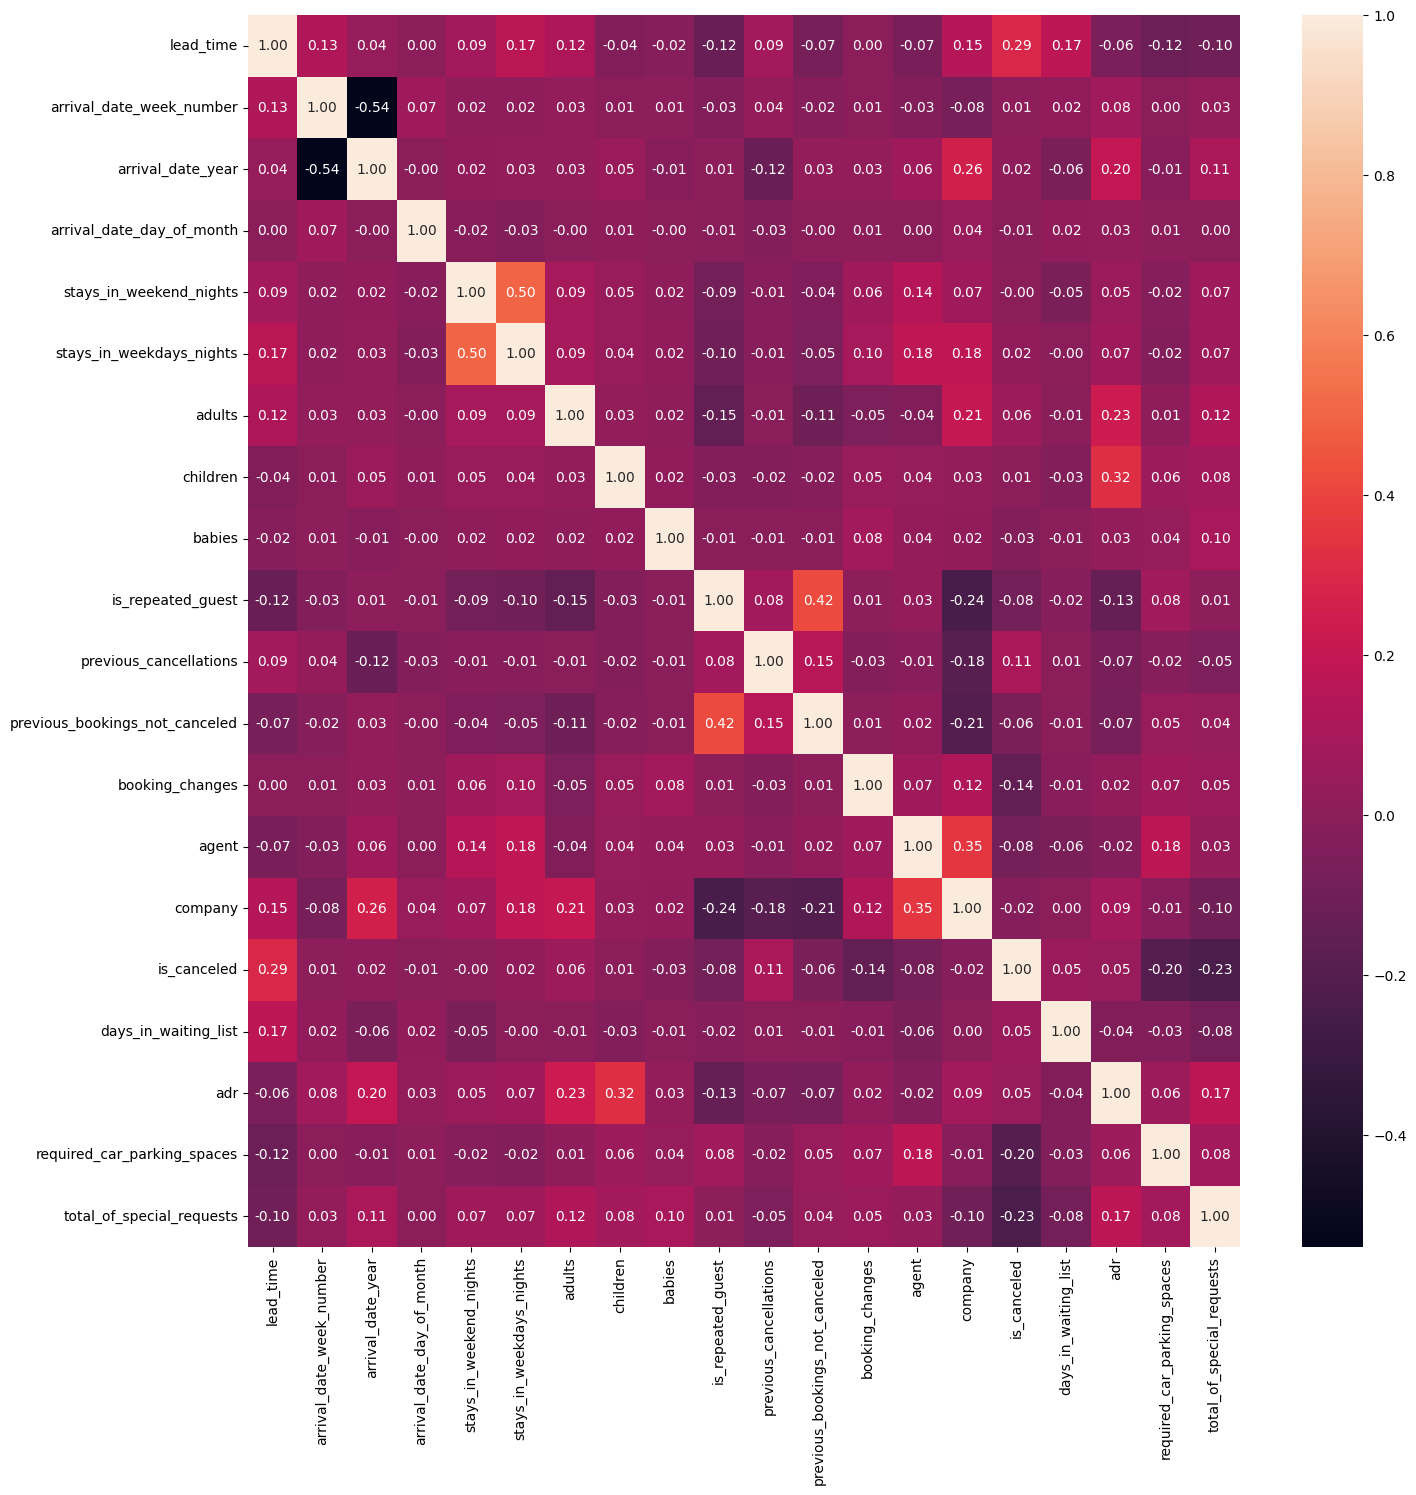

In [21]:
# Heatmap Num Correlation
plt.figure(figsize=(16, 16))
sns.heatmap(df[num].corr(), color = '#365486', annot=True, fmt='.2f')

#### Conclusion
Feature tidak ada yang memiliki korelasi sangat tinggi > 0.7, sehingga diasumsikan bahwa tidak ada column yang redundant. Sehingga, tidak perlu ada dropping column.

In [22]:
# Heatmap Num Correlation
from scipy.stats import chi2_contingency

def cat_vs_resp(column):
    resp_by = df.groupby(column)['is_canceled'].value_counts(normalize = True).to_frame()
    resp_by.columns = ['Proportion']
    resp_by_pvt = resp_by.reset_index().pivot(columns = 'is_canceled', index = column, values = 'Proportion')
    display(resp_by_pvt * 100)

    contingency = df.groupby([column, 'is_canceled']).agg({'is_canceled': 'count'}).rename(columns={'is_canceled': 'count'}).reset_index().pivot(index = column, columns = 'is_canceled', values = 'count')
    stats, p, dof, expected = chi2_contingency(contingency)
    if p < 0.5:
        print(f'Column {column} has a strong relationship with the Is Canceled Label.')
    else:
        print(f'Column {column} has a weak relationship with the Is Canceled Label.')

    resp_by_pvt.plot(kind = 'bar', stacked = True, ylabel = 'Proportion')
    plt.title(f'Is Canceled Proportion by {column}')
    plt.show()


is_canceled,0,1
hotel,,
City Hotel,58.273037,41.726963
Resort Hotel,72.236645,27.763355


Column hotel has a strong relationship with the Is Canceled Label.


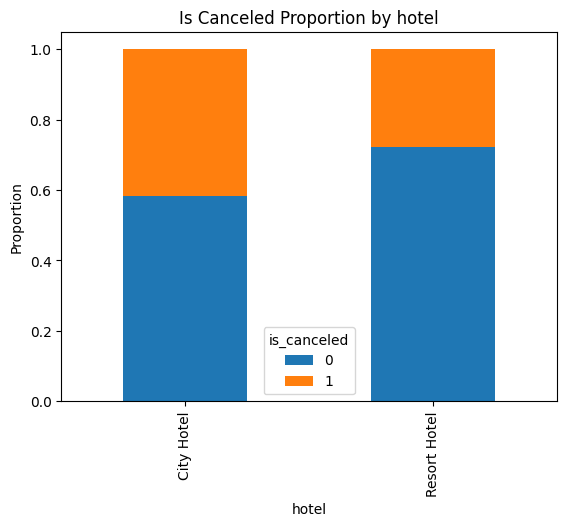

is_canceled,0,1
arrival_date_month,,
April,66.584036,33.415964
August,58.542828,41.457172
December,61.953405,38.046595
February,65.029499,34.970501
January,68.766559,31.233441
July,60.334153,39.665847
June,59.202814,40.797186
March,69.522685,30.477315
May,67.847662,32.152338


Column arrival_date_month has a strong relationship with the Is Canceled Label.


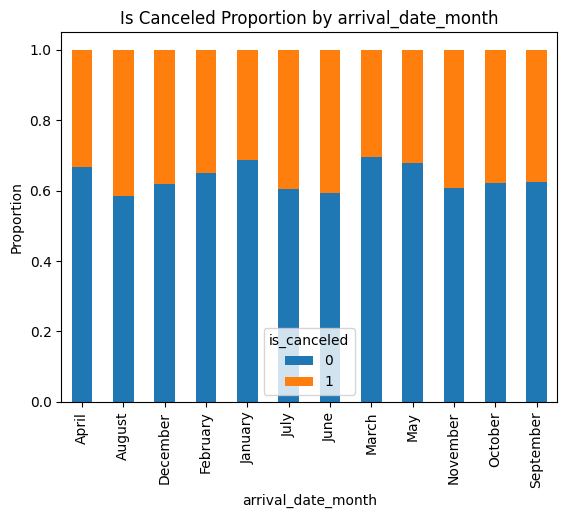

is_canceled,0,1
meal,,
Breakfast,62.615101,37.384899
Dinner,65.539653,34.460347
Full Board,40.100251,59.899749
No Meal,62.760563,37.239437
Undefined,75.534645,24.465355


Column meal has a strong relationship with the Is Canceled Label.


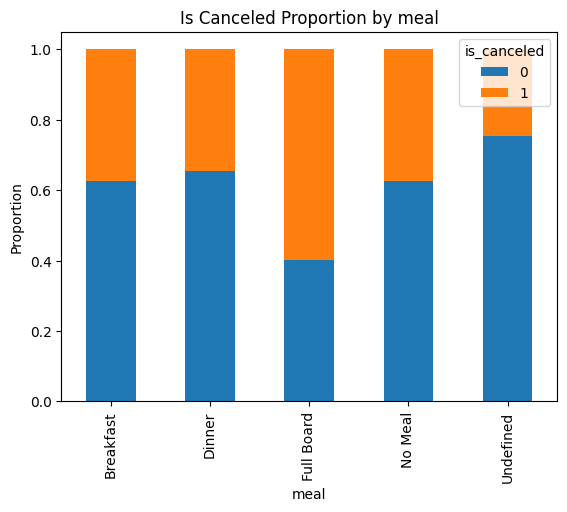

is_canceled,0,1
city,,
Kabupaten Aceh Jaya,100.000000,NaN
Kabupaten Bandung,83.285303,16.714697
Kabupaten Bandung Barat,71.641791,28.358209
Kabupaten Bangka,79.775744,20.224256
Kabupaten Bangkalan,69.491525,30.508475
...,...,...
Kota Tegal,91.891892,8.108108
Kota Ternate,100.000000,NaN
Kota Tidore Kepulauan,100.000000,NaN


Column city has a weak relationship with the Is Canceled Label.


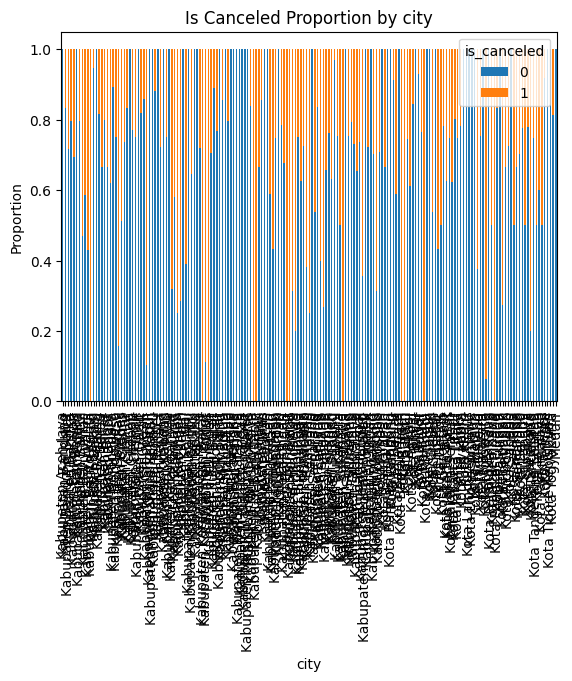

is_canceled,0,1
market_segment,,
Aviation,78.059072,21.940928
Complementary,86.944818,13.055182
Corporate,81.265345,18.734655
Direct,84.658099,15.341901
Groups,38.937964,61.062036
Offline TA/TO,65.683967,34.316033
Online TA,63.278857,36.721143
Undefined,NaN,100.000000


Column market_segment has a weak relationship with the Is Canceled Label.


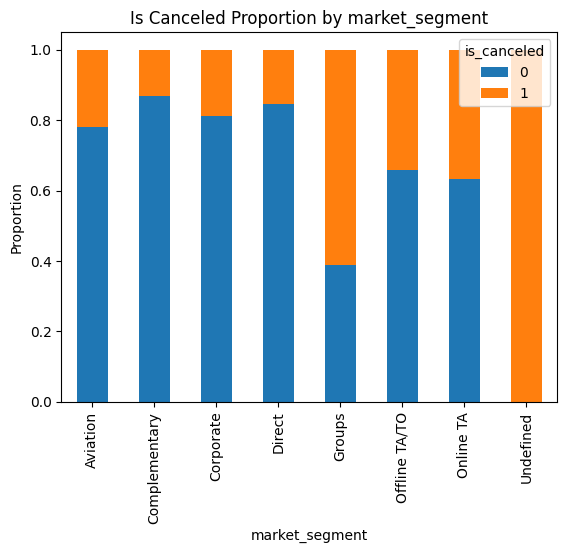

is_canceled,0,1
distribution_channel,,
Corporate,77.924217,22.075783
Direct,82.540116,17.459884
GDS,80.829016,19.170984
TA/TO,58.974149,41.025851
Undefined,20.000000,80.000000


Column distribution_channel has a strong relationship with the Is Canceled Label.


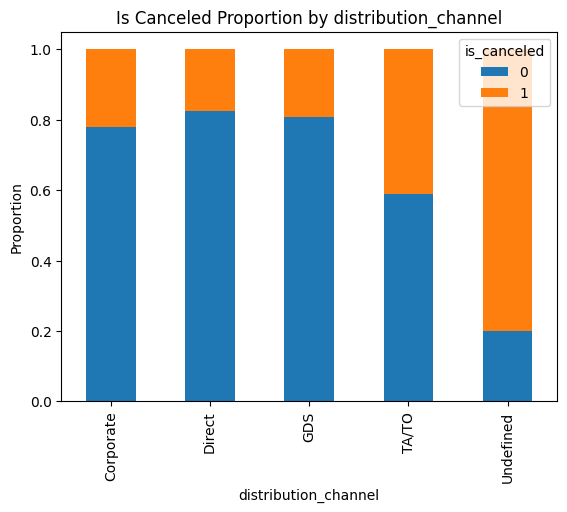

is_canceled,0,1
deposit_type,,
No Deposit,71.622978,28.377022
Non Refund,0.637554,99.362446
Refundable,77.777778,22.222222


Column deposit_type has a strong relationship with the Is Canceled Label.


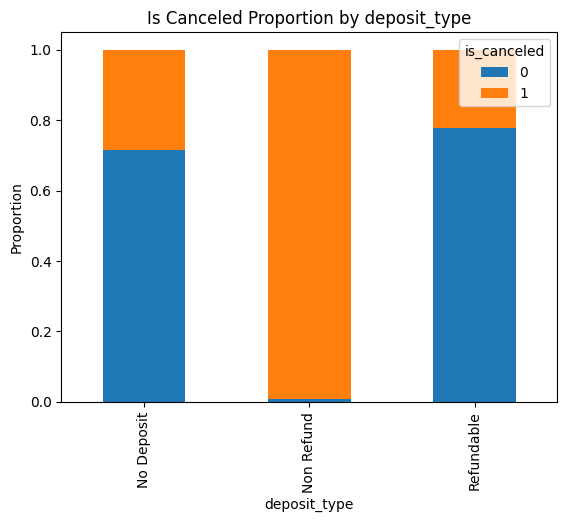

is_canceled,0,1
customer_type,,
Bussiness,89.774697,10.225303
Contract,69.038273,30.961727
Family,74.570132,25.429868
Personal,59.253680,40.746320


Column customer_type has a strong relationship with the Is Canceled Label.


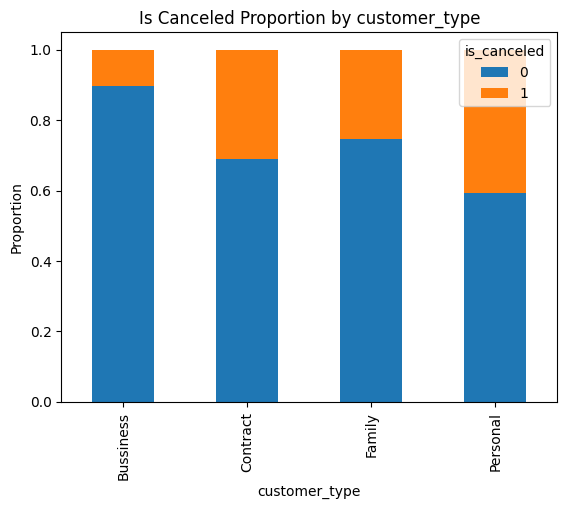

is_canceled,0,1
reservation_status,,
Canceled,NaN,100.0
Check-Out,100.0,NaN
No-Show,NaN,100.0


Column reservation_status has a weak relationship with the Is Canceled Label.


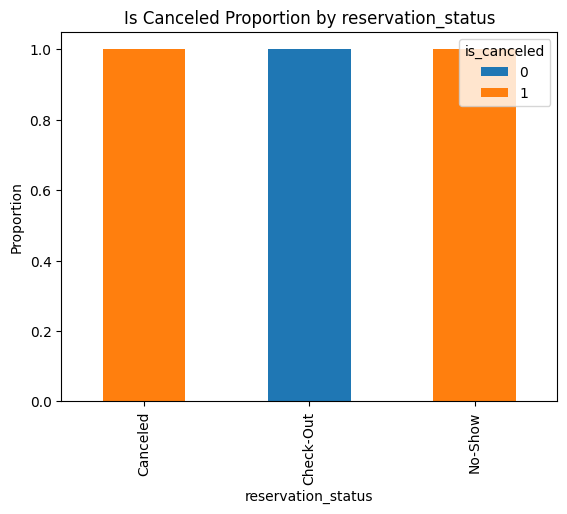

In [23]:
for col in df[cat]:
    cat_vs_resp(col)

Summary

1. Column kategori (Marital_Status, Education, Favorite_Product, 2nd_Favorite_Product) dilakukan pengecekan korelasi terhadap target(Response) untuk mengetahui apakah kategori tersebut perlu dilakukan features encoding atau tidak.
2. Algoritma pengecekan korelasi yang digunakan adalah chi2_contingency, berdasarkan hasil pengecekan ternyata data kategori memiliki korelasi yang kuat terhadap target (Response) sehingga perlu dilakukan features Encoding.
3.  Features encoding dilakukan supaya permodelan mechine learning nantinya dapat belajar data yang lebih banyak, features encoding yang dilakukan menggunakan metode One Hot Encoding.

# Data Cleansing

## Handling Null Value

Fitur yang terdapat null values **company, city, children, agent**
Action :

* **company** - null value **diisi dengan 0**, mengindikasikan tamu tidak bersal dari company
* **agent** - null value **diisi dengan 0**, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
* **children** - null value **diisi dengan 0**, mengindikasikan tamu tidak membawa anak-anak
* **city** - null values **diisi dengan 'Undefined'**, karena kota tidak diketahui secara pasti.

In [24]:
df_clean = df.copy()

In [25]:
# company, agent, children
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# city
df_clean['city'].fillna('Undefined', inplace=True)

In [27]:
df_clean.isna().sum().sum()

0

## Handling Inconsistent and Extream Values

Fitur meal dapat dikategorikan menjadi 2 yaitu 'With Meal' dan 'No Meal'

* **'With Meal'** = Breakfast, Full Board, Dinner
* **'No Meal'** = No Meal, Undefined

In [28]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [29]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

Menghapus nilai ekstrim pada data

In [30]:
# extream adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# babies
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# tidak ada tamu
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

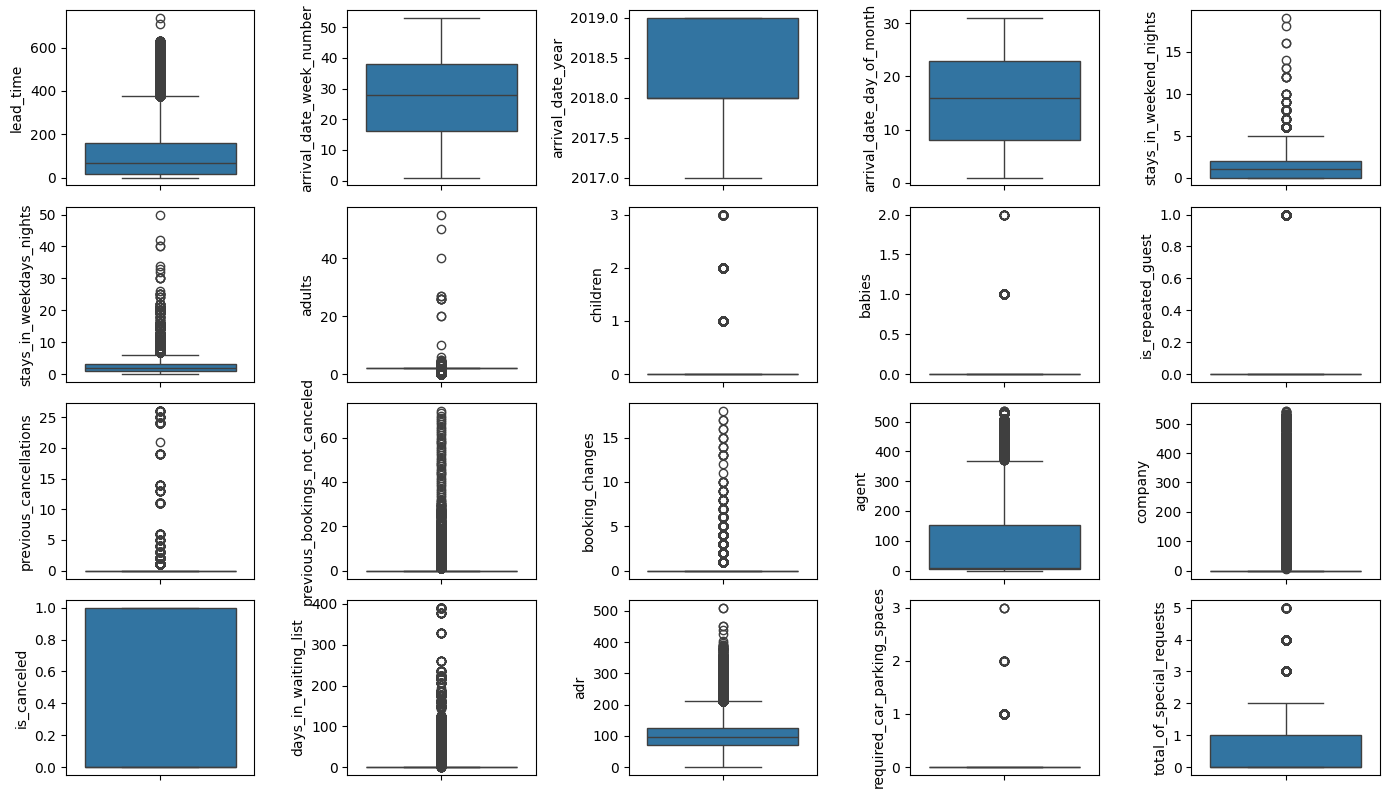

In [31]:
# cek outlier fitur numerikal
plt.figure(figsize=(14, 8))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y = df_clean[num[i]], orient='v')
    plt.tight_layout()

## Change Datatype

In [ ]:
# Modify Data Type Date
df_clean['children'] = df_clean['children'].astype(int)
df_clean['agent'] = df_clean['agent'].astype(int)
df_clean['company'] = df_clean['company'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119203 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119203 non-null  object 
 1   is_canceled                     119203 non-null  int64  
 2   lead_time                       119203 non-null  int64  
 3   arrival_date_year               119203 non-null  int64  
 4   arrival_date_month              119203 non-null  object 
 5   arrival_date_week_number        119203 non-null  int64  
 6   arrival_date_day_of_month       119203 non-null  int64  
 7   stays_in_weekend_nights         119203 non-null  int64  
 8   stays_in_weekdays_nights        119203 non-null  int64  
 9   adults                          119203 non-null  int64  
 10  children                        119203 non-null  int64  
 11  babies                          119203 non-null  int64  
 12  meal            

## Handling Duplicated Data

In [32]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
8861,Resort Hotel,1,161,2018,December,43,17,1,1,2,...,0,No Deposit,240.0,0.0,0,Personal,68.0,0,0,Canceled
77863,City Hotel,0,18,2017,November,40,27,2,0,1,...,2,No Deposit,1.0,0.0,0,Family,170.0,0,0,Check-Out


Berdasarkan analisi lebih lanjut data duplikat tidak akan di hapus. Hal tersebut dikarenakan:

* Jumlah yang banyak dan penghapusan data duplikat mempengaruhi nilai statistik dalam analisis
* **Dalam dataset tidak terdapat unik_id/unik_booking_id dan tanggal,** **data duplikat bisa saja memiliki informasi penting**. Mungkin terdapat pemesanan yang sama terjadi pada waktu yang berbeda.

In [33]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


# Data Visualization

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,2
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,3
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,4


## Monthly Hotel Bookings Analysis Based on Hotel Type

In [50]:
df_hotel = df_clean.copy()

### Ratio Total Bookings

In [36]:
# group fitur hotel
hotel_type = df_hotel.groupby('hotel')[['hotel']].count()

hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


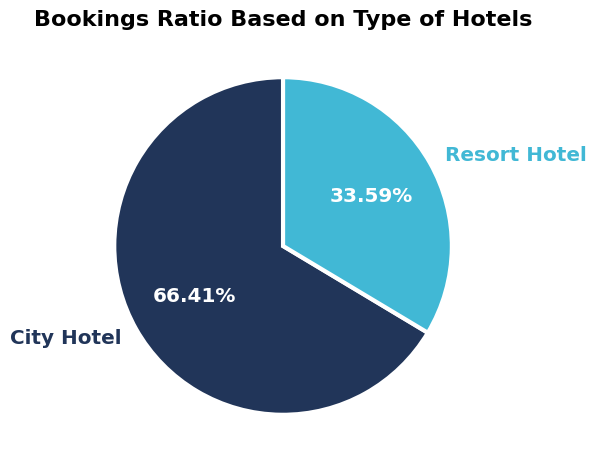

In [43]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (6, 6))
patches, texts, pcts = ax.pie(
                       hotel_type['total'],
                       labels=hotel_type['hotel'],
                       autopct = '%.2f%%',
                       wedgeprops ={'linewidth': 3.0,
                                   'edgecolor': 'white'},
                       textprops = {'size': 'large'},
                       startangle = 90,
                       colors = [custom_color[label] for label in hotel_type['hotel']])

# Modifying Title
title = 'Bookings Ratio Based on Type of Hotels'
plt.title(title,
          fontsize = 16,
          loc = 'center',
          pad = 7,
          color = 'black',
          weight = 'bold')

# Display values on top of each bar
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)

# Showing plot
plt.tight_layout()
plt.show()


Summary:

* **City Hotel 66.41% lebih banyak dipesan oleh pelanggan.**
* Diduga bahwa **mayoritas pelanggan** yang memesan Hotel City ini merupakan **pelancong** yang memiliki **aktivitas utama disekitar tempat mereka menginap**, bukan tujuan utama mereka untuk melakukan aktivitas di hotel.
* **City hotel biasanya terletak di pusat kota** atau daerah perkotaan, dekat dengan tempat-tempat wisata dan bisnis. Mereka biasanya dirancang untuk memberikan kenyamanan dan kemudahan akses ke fasilitas dan aktivitas di kota, seperti restoran, pusat perbelanjaan, dan tempat wisata.
* Sementara **33.59% lainnya** merupakan **pelanggan Resort Hotel**. Palanggan yang memesan hotel ini diduga memang memiliki **tujuan untuk berlibur dan bersantai di tempat ini** karena **Resort hotel** biasanya **terletak** di tempat-tempat yang indah seperti **tepi pantai, pegunungan, atau daerah pedesaan yang tenang dan terdapat fasilitas yang lengkap.**

In [51]:
# Buat dictionary untuk mengurutkan bulan
bulan_urutan = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Mengonversi kolom 'arrival_date_month' menjadi tipe kategori dengan urutan yang telah ditentukan
df_hotel['arrival_date_month'] = pd.Categorical(df_hotel['arrival_date_month'], categories = bulan_urutan.keys(), ordered = True)

df_hotel = df_hotel.groupby(['hotel', 'arrival_date_month'])['arrival_date_month'].agg(['count']).reset_index()
df_hotel = df_hotel.sort_values(by = 'arrival_date_month', ascending = True)
df_hotel = df_hotel.reset_index(drop = True)

df_hotel

,hotel,arrival_date_month,count
0,City Hotel,January,4336
1,Resort Hotel,January,2435
2,City Hotel,February,4114
3,Resort Hotel,February,2645
4,City Hotel,March,3729
5,Resort Hotel,March,2191
6,City Hotel,April,4950
7,Resort Hotel,April,3102
8,City Hotel,May,6433
9,Resort Hotel,May,3331


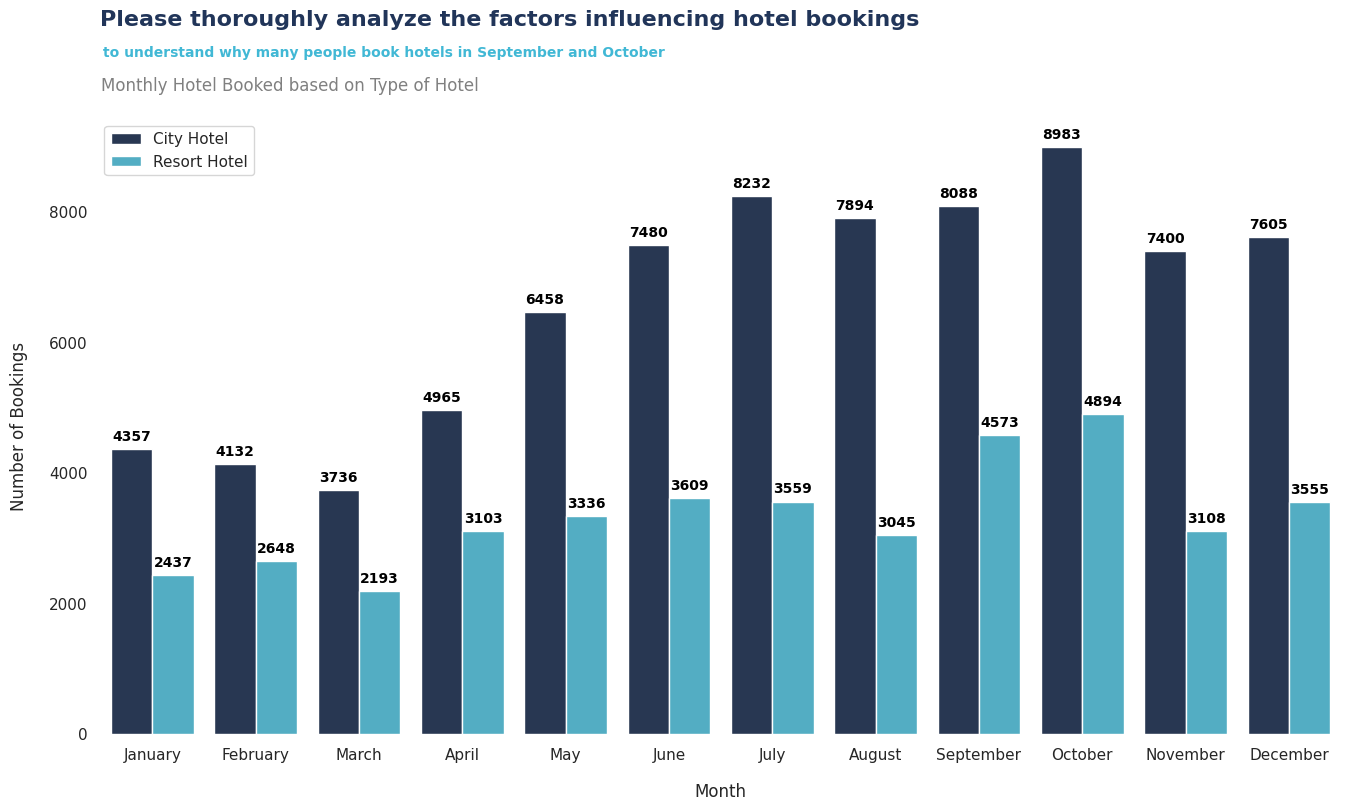

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 8))
plot_sns = sns.barplot(x = 'arrival_date_month', y = 'count', hue = 'hotel', data = df_hotel, palette = custom_color)

# Modifying Subtitle
sub_title = 'Please thoroughly analyze the factors influencing hotel bookings'
plt.annotate(sub_title,
             xy = (0.66, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'to understand why many people book hotels in September and October'
plt.annotate(sub_title1,
             xy = (0.455, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#41B8D5',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Monthly Hotel Booked based on Type of Hotel'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Display values on top of each bar
for p in plot_sns.patches:
    if p.get_height() != 0:  # Hanya tambahkan label jika nilai bukan nol
        plot_sns.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center',
                           va = 'center',
                           fontsize = 10,
                           xytext = (0, 9),
                           color = 'black',
                           weight = 'bold',
                           textcoords = 'offset points',
                           rotation = 0)

# Modifying Label
plt.xlabel('Month', labelpad = 15)
plt.ylabel('Number of Bookings', labelpad = 15)

# Modifying Legend
plt.legend(loc = 'upper right', bbox_to_anchor=(0.13, 1))

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### **Interpretation**
**Banyaknya jumlah pemesanan hotel** baik
tipe city hotel maupun resort hotel pada **bulan September sebanya 13.662 dan Oktober sebanyak 13.877 dibandingkan bulan - bulan lainnya** menjadi **insight** yang sangat **menarik** untuk analisis lebih lanjut.

* Ketika musim **liburan**, pemesanan hotel cenderung mengalami **peningkatan**.
* Pemesanan kedua tipe hotel pada perode bulan **Mei - Agustus** memiliki nilai tertinggi, apalgi untuk City Hotel mengalami peningkatan yang signifikan pada periode waktu tersebut. Hal ini dapat dikarenakan pada 2017-2019 pada bulan Mei - Agustus selain **liburan sekolah**, juga bertepatan dengan **banyaknya hari libur nasional** seperti cuti bersama dan even keagamaan seperti ramadhan dan lebaran. Sehingga banyak kesempatan untuk masyarakat menfaatkan waktunya untuk berlibur, berkunjung ke luar kota, dan melakukan pemesanan hotel. Sedangkan pada musim liburan **Oktober - Desember** bertepatan depan dengan **natal dan tahun baru**.
* Tingkat pemesanan **terendah** terjadi pada periode **Januari - Maret**. Hal ini dapat dikarenakan **sedikit sekali hari libur nasional, awal tahun ajaran baru bagi pelajar**, dan memiliki aktivitas perjalanan bisnis yang tidak sibut karena masih awal tahun.


### Booking Hotel Based on September and October

In [ ]:
# Filtering Month
sao = df.copy()
sao = sao[(sao['arrival_date_month'] == 'September') | (sao['arrival_date_month'] == 'October')]
sao.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,2
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,3
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,4


In [ ]:
# Taking top 10 city
group_by_city = sao.copy()

group_by_city['city'] = group_by_city['city'].astype(str)
group_by_city['city'] = group_by_city['city'].apply(lambda x: ' '.join(x.split()[1:]))

group_by_city = group_by_city.groupby('city')['bookings_number'].count().reset_index()
group_by_city = group_by_city.sort_values(by = 'bookings_number', ascending = False)

city_t10 = group_by_city.head(10)
city_t10

,city,bookings_number
29,Denpasar,10059
12,Batu,2626
5,Bangka,2537
108,Yogyakarta,2092
3,Bandung,1701
51,Kepulauan Seribu,1005
60,Malang,690
59,Magelang,665
91,Sleman,582
14,Belitung,453


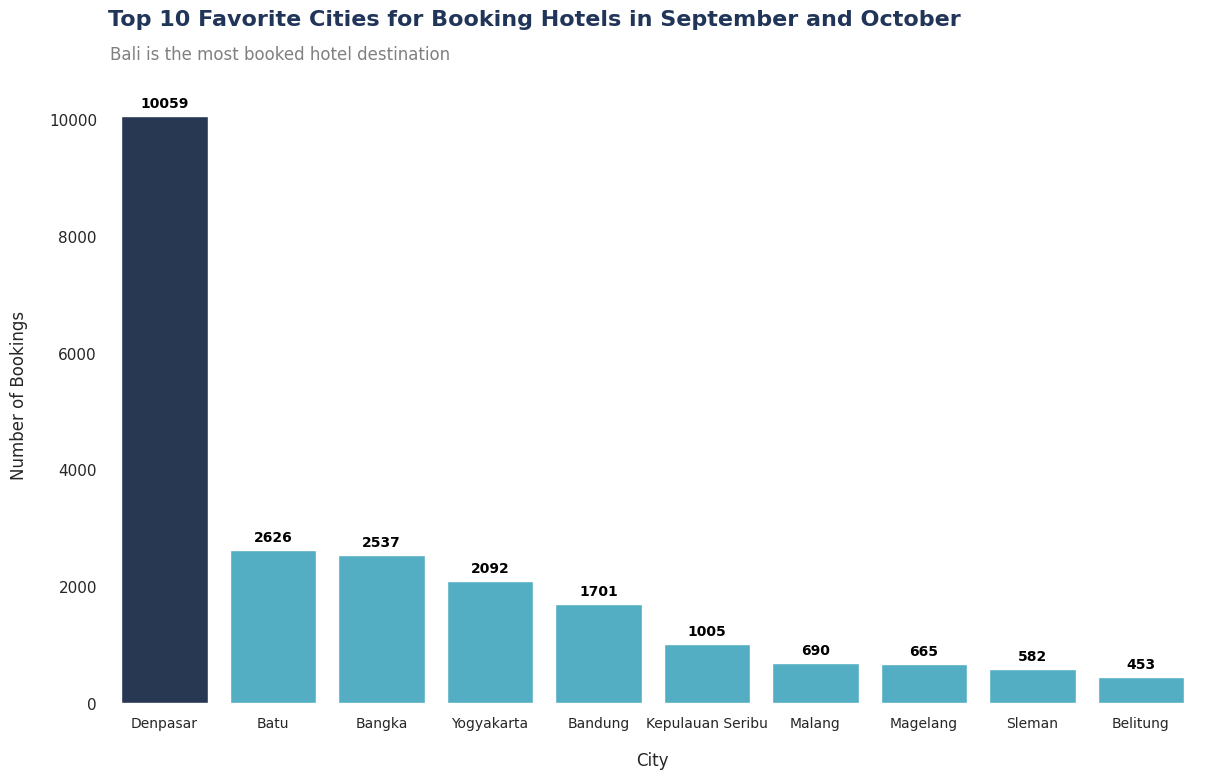

In [ ]:
# Identified Max and Min
max_index = city_t10['bookings_number'].idxmax()

# Setting Color Bar Plot
custom_color = ['#213559' if i == max_index else '#41B8D5' for i in city_t10.index]

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (14, 8))
plot_sns = sns.barplot(x = 'city', y = 'bookings_number', data = city_t10, palette = custom_color)

# Modifying Subtitle
sub_title = 'Top 10 Favorite Cities for Booking Hotels in September and October'
plt.annotate(sub_title,
             xy = (0.784, 1.1),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Bali is the most booked hotel destination'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Display values on top of each bar
for p in plot_sns.patches:
    if p.get_height() != 0:  # Hanya tambahkan label jika nilai bukan nol
        plot_sns.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center',
                           va = 'center',
                           fontsize = 10,
                           xytext = (0, 9),
                           color = 'black',
                           weight = 'bold',
                           textcoords = 'offset points',
                           rotation = 0)

# Modifying X Axis
plot_sns.tick_params(axis = 'x', labelsize = 10)

# Modifying Label
plt.xlabel('City', labelpad = 15)
plt.ylabel('Number of Bookings', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### **Interpretation**
**Cuaca Cerah** di Indonesia **pada bulan September dan Oktober** menjadi salah satu **faktor meningkatnya jumlah pemesanan hotel** pada bulan tersebut.Berdasarkan **Top 10 Favorite City** dapat disimpulkan bahwa lokasi pemesanan hotel **destinasi wisata** yang **sangat populer di Indonesia**. **Bali** dengan jumlah pemesanan **terbanyak 10.059** karena adanya banyak festival salah satunya **Kuta Karnival pada bulan Oktober**.

## Duration of Stay

In [ ]:
duration = df.copy()
duration.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,2
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,3
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,4


### Creating New Column

In [ ]:
# Create Feature Duration of Stay
duration['stay_duration'] = duration['stays_in_weekend_nights'] + duration['stays_in_weekdays_nights']

# Create Duration Category Column
def duration_cat(duration):
    if duration <= 2:
        return '0 - 2 Days'
    elif duration <= 5:
        return '3 - 5 Days'
    elif duration <= 10:
        return '6 - 10 Days'
    elif duration <= 15:
        return '11 - 15 Days'
    elif duration <= 20:
        return '16 - 20 Days'
    elif duration <= 30:
        return '21 - 30 Days'
    else:
        return 'More 30 Days'
duration['stay_duration_category'] = duration['stay_duration'].apply(duration_cat)
duration

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number,stay_duration,stay_duration_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,Personal,0.00,0,0,Check-Out,0,0,0 - 2 Days
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,Personal,0.00,0,0,Check-Out,1,0,0 - 2 Days
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,Personal,75.00,0,0,Check-Out,2,1,0 - 2 Days
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,Personal,75.00,0,0,Check-Out,3,1,0 - 2 Days
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,Personal,98.00,0,1,Check-Out,4,2,0 - 2 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,0,Personal,96.14,0,0,Check-Out,119385,7,6 - 10 Days
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,0,Personal,225.43,0,2,Check-Out,119386,7,6 - 10 Days
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,0,Personal,157.71,0,4,Check-Out,119387,7,6 - 10 Days
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,0,Personal,104.40,0,0,Check-Out,119388,7,6 - 10 Days


### Bookings Canceled

In [ ]:
# Filtering Month
duration = duration[duration['is_canceled'] == 1]
duration.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number,stay_duration,stay_duration_category
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,Personal,82.0,0,1,Canceled,8,3,3 - 5 Days
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,Personal,105.5,0,0,Canceled,9,3,3 - 5 Days
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,0,0,Personal,123.0,0,0,Canceled,10,4,3 - 5 Days
27,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,0,0,Personal,107.0,0,2,Canceled,27,7,6 - 10 Days
32,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,0,0,Personal,108.3,0,2,Canceled,32,10,6 - 10 Days


### Features Aggregation

In [ ]:
# Buat dictionary untuk mengurutkan bulan
category_urutan = {'0 - 2 Days': 1, '3 - 5 Days': 2, '6 - 10 Days': 3, '11 - 15 Days': 4,
                   '15 - 20 Days': 5, '21 - 30 Days': 6, 'More 30 Days': 7}

# Mengonversi kolom 'arrival_date_month' menjadi tipe kategori dengan urutan yang telah ditentukan
duration['stay_duration_category'] = pd.Categorical(duration['stay_duration_category'], categories = category_urutan.keys(), ordered = True)

group_by_duration = duration.groupby(['hotel', 'stay_duration_category'])['bookings_number'].count().reset_index()
group_by_duration = group_by_duration.sort_values(by = 'stay_duration_category', ascending = True)
group_by_duration = group_by_duration.reset_index(drop = True)

group_by_duration

,hotel,stay_duration_category,bookings_number
0,City Hotel,0 - 2 Days,14560
1,Resort Hotel,0 - 2 Days,2909
2,City Hotel,3 - 5 Days,16115
3,Resort Hotel,3 - 5 Days,4257
4,City Hotel,6 - 10 Days,2136
5,Resort Hotel,6 - 10 Days,3478
6,City Hotel,11 - 15 Days,199
7,Resort Hotel,11 - 15 Days,363
8,City Hotel,15 - 20 Days,0
9,Resort Hotel,15 - 20 Days,0


In [ ]:
total_count = group_by_duration['bookings_number'].sum()
group_by_duration['Ratio %'] = (group_by_duration['bookings_number'] / total_count) * 100

canc = group_by_duration.sort_values(by = 'Ratio %', ascending = False)
canc = group_by_duration.reset_index(drop = True)

round(canc, 2)

,hotel,stay_duration_category,bookings_number,Ratio %
0,City Hotel,0 - 2 Days,14560,33.07
1,Resort Hotel,0 - 2 Days,2909,6.61
2,City Hotel,3 - 5 Days,16115,36.61
3,Resort Hotel,3 - 5 Days,4257,9.67
4,City Hotel,6 - 10 Days,2136,4.85
5,Resort Hotel,6 - 10 Days,3478,7.90
6,City Hotel,11 - 15 Days,199,0.45
7,Resort Hotel,11 - 15 Days,363,0.82
8,City Hotel,15 - 20 Days,0,0.00
9,Resort Hotel,15 - 20 Days,0,0.00


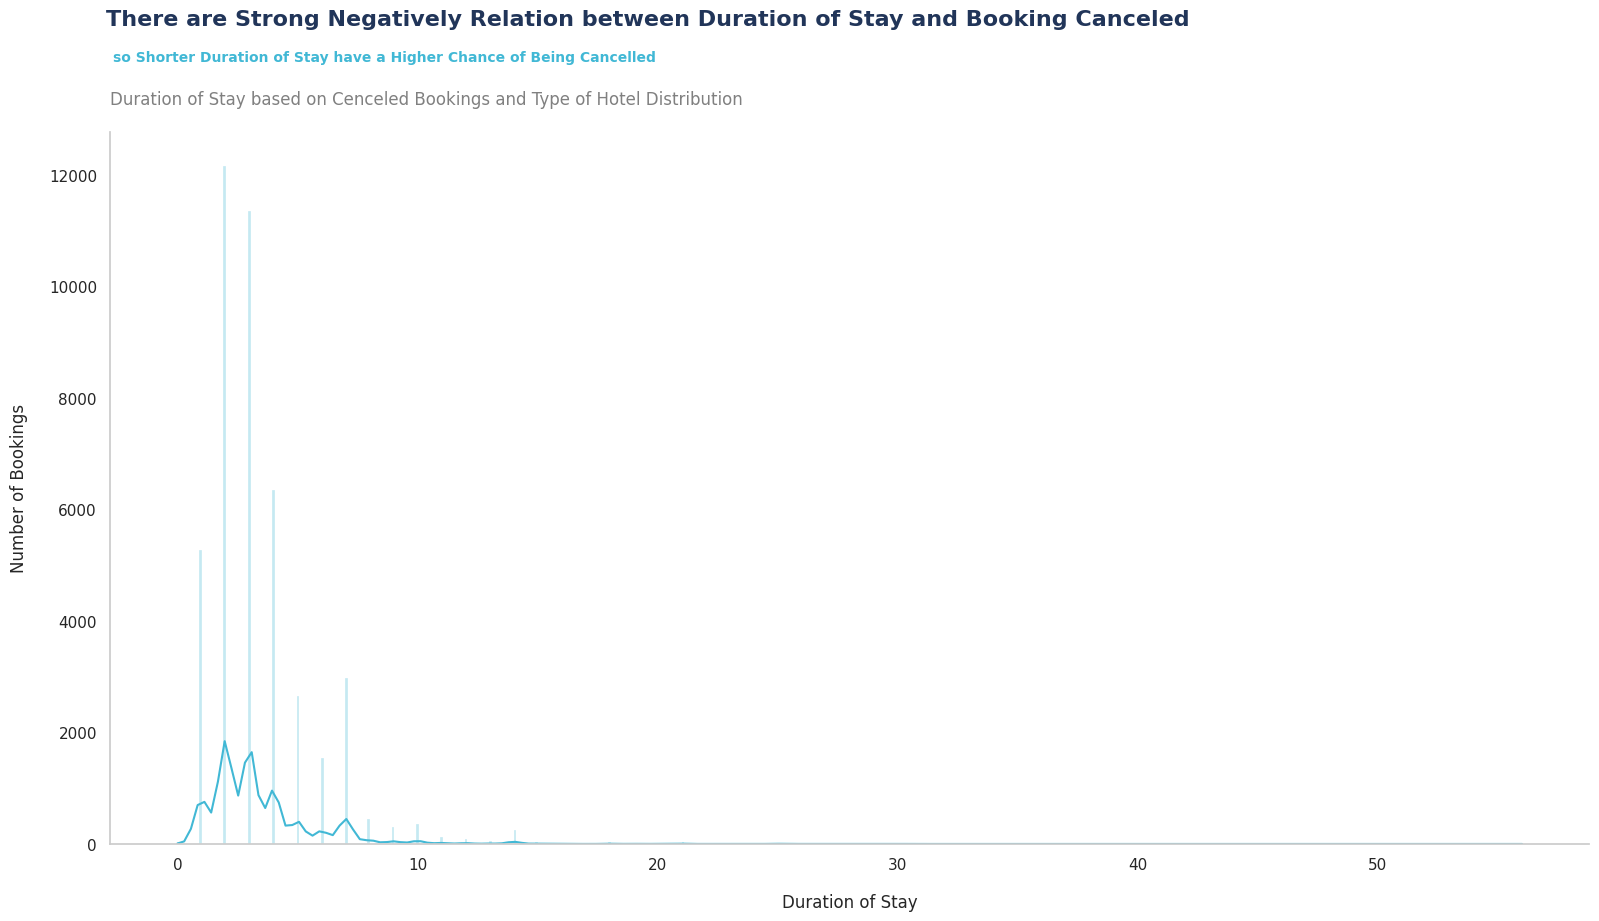

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Distribution Plot
sns.set(style = 'whitegrid')
plot_sns = sns.displot(data = duration,
                       x = 'stay_duration',
                       kind = 'hist',
                       kde = True,
                       height = 8,
                       aspect = 2,
                       color = '#41B8D5',
                       alpha = 0.3)

# Modifying Subtitle
sub_title = 'There are Strong Negatively Relation between Duration of Stay and Booking Canceled'
plt.annotate(sub_title,
             xy = (0.73, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'so Shorter Duration of Stay have a Higher Chance of Being Cancelled'
plt.annotate(sub_title1,
             xy = (0.36, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#41B8D5',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Duration of Stay based on Cenceled Bookings and Type of Hotel Distribution'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')


# Modifying Label
plt.xlabel('Duration of Stay', labelpad = 15)
plt.ylabel('Number of Bookings', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.despine(left=False, bottom=False)

# Showing plot
plt.show()


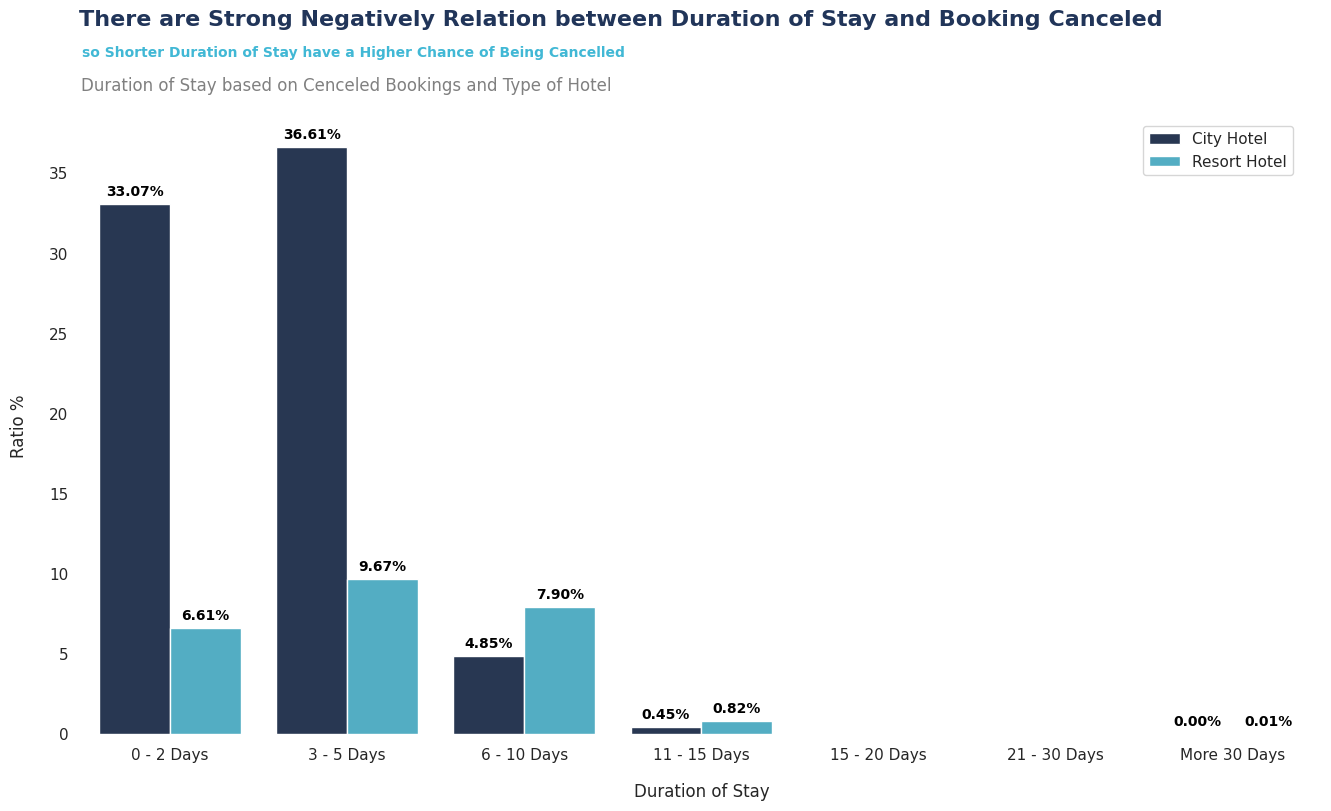

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 8))
plot_sns = sns.barplot(x = 'stay_duration_category', y = 'Ratio %', hue = 'hotel', data = group_by_duration, palette = custom_color)

# Modifying Subtitle
sub_title = 'There are Strong Negatively Relation between Duration of Stay and Booking Canceled'
plt.annotate(sub_title,
             xy = (0.872, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'so Shorter Duration of Stay have a Higher Chance of Being Cancelled'
plt.annotate(sub_title1,
             xy = (0.438, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#41B8D5',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Duration of Stay based on Cenceled Bookings and Type of Hotel'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Display values on top of each bar
for p in plot_sns.patches:
    if p.get_height() != 0:  # Hanya tambahkan label jika nilai bukan nol
        plot_sns.annotate(f'{format(p.get_height(), ".2f")}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center',
                         va = 'center',
                         fontsize = 10,
                         xytext = (0, 9),
                         color = 'black',
                         weight = 'bold',
                         textcoords = 'offset points',
                         rotation = 0)

# Modifying Label
plt.xlabel('Duration of Stay', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Legend
plt.legend(loc = 'upper left', bbox_to_anchor=(0.85, 1))

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### **Interpretation**
**Lebih dari 70% pembatalan** pemesanan hotel **dilakukan oleh customer dengan durasi menginap kurang dari 5 hari**. **Pembatalan tertinggi** terjadi pada **durasi menginap 3 - 5 hari dengan tipe City Hotel sebesar 36.61%. City Hotel** menjadi tipe hotel yang pemesanannya **sering dibatalkan oleh customer yang belum pernah menginap atau memiliki durasi menginap kurang dari 5 hari.** Berdasarkan hal tersebut, **semakin lama durasi menginap kemungkinan pembatalan **pemesanan hotel akan **semakin kecil.**


## Booking Duration

In [ ]:
booking = df.copy()
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,2
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,3
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,4


### Bookings Canceled

In [ ]:
# Filtering Month
booking = booking[booking['is_canceled'] == 1]
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240,0,0,Personal,82.0,0,1,Canceled,8
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,No Deposit,15,0,0,Personal,105.5,0,0,Canceled,9
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,No Deposit,240,0,0,Personal,123.0,0,0,Canceled,10
27,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,No Deposit,240,0,0,Personal,107.0,0,2,Canceled,27
32,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,No Deposit,0,0,0,Personal,108.3,0,2,Canceled,32


### Creating New Column

In [ ]:
# Create Lead Time Category Column
def ltime_cat(ltime):
    if ltime <= 30:
        return '0 - 1 Months'
    elif ltime <= 60:
        return '1 - 2 Months'
    elif ltime <= 90:
        return '2 - 3 Months'
    elif ltime <= 120:
        return '3 - 4 Months'
    elif ltime <= 150:
        return '4 - 5 Months'
    elif ltime <= 180:
        return '5 - 6 Months'
    elif ltime <= 210:
        return '6 - 7 Months'
    elif ltime <= 240:
        return '7 - 8 Months'
    elif ltime <= 270:
        return '8 - 9 Months'
    elif ltime <= 300:
        return '9 - 10 Months'
    else:
        return 'More 10 Months'
booking['lead_time_category'] = booking['lead_time'].apply(ltime_cat)
booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookings_number,lead_time_category
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,240,0,0,Personal,82.0,0,1,Canceled,8,2 - 3 Months
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,15,0,0,Personal,105.5,0,0,Canceled,9,2 - 3 Months
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,240,0,0,Personal,123.0,0,0,Canceled,10,0 - 1 Months
27,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,240,0,0,Personal,107.0,0,2,Canceled,27,1 - 2 Months
32,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,0,0,0,Personal,108.3,0,2,Canceled,32,3 - 4 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2019,June,17,25,0,0,0,...,9,0,0,Personal,0.0,0,3,Canceled,110280,4 - 5 Months
111355,City Hotel,1,4,2019,August,23,5,1,0,1,...,0,238,0,Personal,65.0,0,0,Canceled,111355,0 - 1 Months
111924,City Hotel,1,7,2019,July,22,31,0,1,1,...,0,238,0,Personal,65.0,0,0,Canceled,111924,0 - 1 Months
111925,City Hotel,1,6,2019,September,29,17,1,0,1,...,0,238,0,Personal,65.0,0,0,No-Show,111925,0 - 1 Months


### Features Aggregation

In [ ]:
# Buat dictionary untuk mengurutkan bulan
category_urutan = {'0 - 1 Months': 1, '1 - 2 Months': 2, '2 - 3 Months': 3, '3 - 4 Months': 4,
                   '4 - 5 Months': 5, '5 - 6 Months': 6,  '6 - 7 Months': 7,  '7 - 8 Months': 8,
                   '8 - 9 Months': 9, '9 - 10 Months': 10, 'More 10 Months': 11}

# Mengonversi kolom 'arrival_date_month' menjadi tipe kategori dengan urutan yang telah ditentukan
booking['lead_time_category'] = pd.Categorical(booking['lead_time_category'], categories = category_urutan.keys(), ordered = True)

group_by_booking = booking.groupby(['hotel', 'lead_time_category'])['bookings_number'].count().reset_index()
group_by_booking = group_by_booking.sort_values(by = 'lead_time_category', ascending = True)
group_by_booking = group_by_booking.reset_index(drop = True)

group_by_booking

,hotel,lead_time_category,bookings_number
0,City Hotel,0 - 1 Months,5199
1,Resort Hotel,0 - 1 Months,1986
2,City Hotel,1 - 2 Months,4608
3,Resort Hotel,1 - 2 Months,1566
4,City Hotel,2 - 3 Months,3692
5,Resort Hotel,2 - 3 Months,1275
6,City Hotel,3 - 4 Months,3486
7,Resort Hotel,3 - 4 Months,1159
8,City Hotel,4 - 5 Months,2543
9,Resort Hotel,4 - 5 Months,1032


In [ ]:
total_count = group_by_booking['bookings_number'].sum()
group_by_booking['Ratio %'] = (group_by_booking['bookings_number'] / total_count) * 100

canc = group_by_booking.sort_values(by = 'Ratio %', ascending = False)
canc = group_by_booking.reset_index(drop = True)

round(canc, 2)

,hotel,lead_time_category,bookings_number,Ratio %
0,City Hotel,0 - 1 Months,5199,11.76
1,Resort Hotel,0 - 1 Months,1986,4.49
2,City Hotel,1 - 2 Months,4608,10.42
3,Resort Hotel,1 - 2 Months,1566,3.54
4,City Hotel,2 - 3 Months,3692,8.35
5,Resort Hotel,2 - 3 Months,1275,2.88
6,City Hotel,3 - 4 Months,3486,7.88
7,Resort Hotel,3 - 4 Months,1159,2.62
8,City Hotel,4 - 5 Months,2543,5.75
9,Resort Hotel,4 - 5 Months,1032,2.33


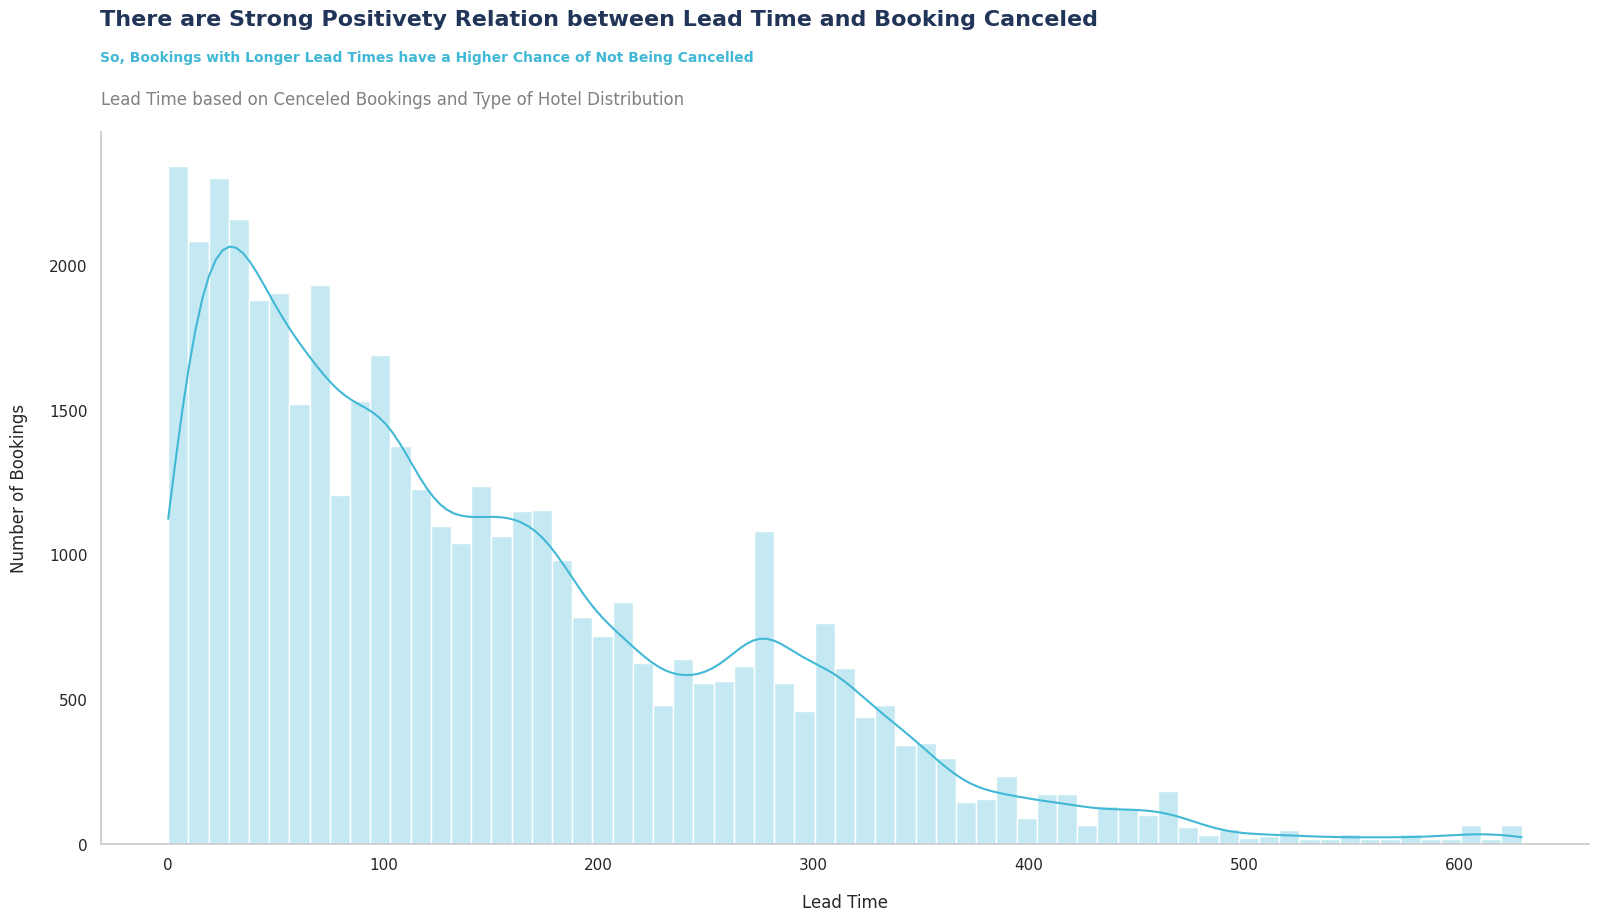

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Distribution Plot
sns.set(style = 'whitegrid')
plot_sns = sns.displot(data = booking,
                       x = 'lead_time',
                       kind = 'hist',
                       kde = True,
                       height = 8,
                       aspect = 2,
                       color = '#41B8D5',
                       alpha = 0.3)

# Modifying Subtitle
sub_title = 'There are Strong Positivety Relation between Lead Time and Booking Canceled'
plt.annotate(sub_title,
             xy = (0.67, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'So, Bookings with Longer Lead Times have a Higher Chance of Not Being Cancelled'
plt.annotate(sub_title1,
             xy = (0.439, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#41B8D5',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Lead Time based on Cenceled Bookings and Type of Hotel Distribution'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')


# Modifying Label
plt.xlabel('Lead Time', labelpad = 15)
plt.ylabel('Number of Bookings', labelpad = 15)

# Modifying Grid
plt.grid(False)
plot_sns.despine(left=False, bottom=False)

# Showing plot
plt.show()


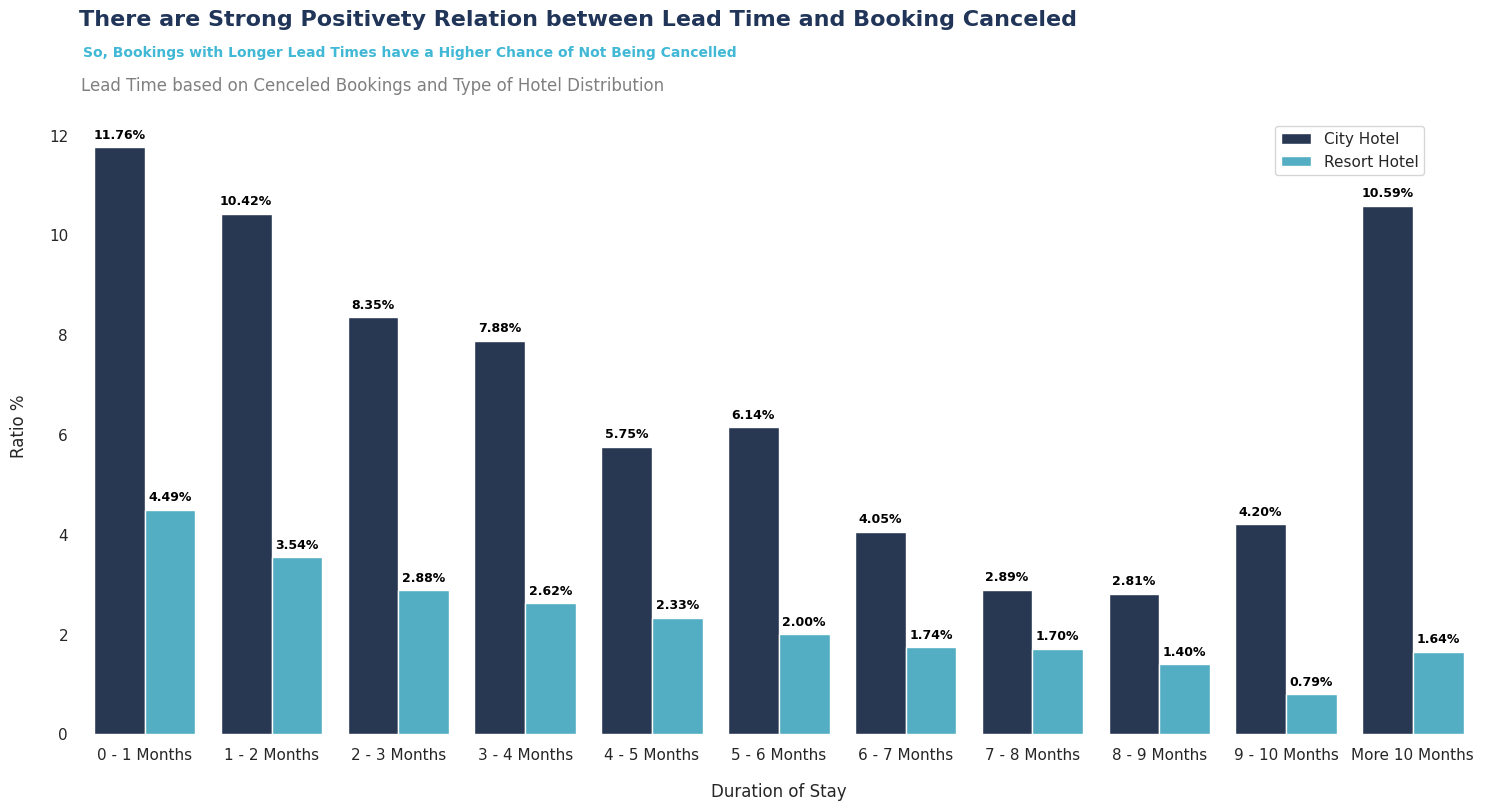

In [ ]:
# Setting Color Bar Plot
custom_color = {
    'City Hotel' : '#213559',
    'Resort Hotel' : '#41B8D5'
}

# Creating Bar Plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 8))
plot_sns = sns.barplot(x = 'lead_time_category', y = 'Ratio %', hue = 'hotel', data = group_by_booking, palette = custom_color)

# Modifying Subtitle
sub_title = 'There are Strong Positivety Relation between Lead Time and Booking Canceled'
plt.annotate(sub_title,
             xy = (0.714, 1.15),
             xycoords = 'axes fraction',
             fontsize = 16,
             color = '#213559',
             ha = 'right',
             weight = 'bold')

# Modifying Subtitle
sub_title1 = 'So, Bookings with Longer Lead Times have a Higher Chance of Not Being Cancelled'
plt.annotate(sub_title1,
             xy = (0.47, 1.1),
             xycoords = 'axes fraction',
             fontsize = 10,
             color = '#41B8D5',
             ha = 'right',
             weight = 'bold')

# Modifying Title
title = 'Lead Time based on Cenceled Bookings and Type of Hotel Distribution'
plt.title(title,
          fontsize = 12,
          loc = 'left',
          pad = 20,
          color = 'grey')

# Display values on top of each bar
for p in plot_sns.patches:
    if p.get_height() != 0:  # Hanya tambahkan label jika nilai bukan nol
        plot_sns.annotate(f'{format(p.get_height(), ".2f")}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center',
                         va = 'center',
                         fontsize = 9,
                         xytext = (0, 9),
                         color = 'black',
                         weight = 'bold',
                         textcoords = 'offset points',
                         rotation = 0)

# Modifying Label
plt.xlabel('Duration of Stay', labelpad = 15)
plt.ylabel('Ratio %', labelpad = 15)

# Modifying Legend
plt.legend(loc = 'upper left', bbox_to_anchor=(0.85, 1))

# Modifying Grid
plt.grid(False)
plot_sns.spines['top'].set_color('none')
plot_sns.spines['bottom'].set_color('none')
plot_sns.spines['left'].set_color('none')
plot_sns.spines['right'].set_color('none')

# Showing plot
plt.show()


### **Interpretation**
**Dalam range 30 hari lead time off bookings** tingkat pembatalan **mengalami penurunan sekitar 0.4 - 2.07%** baik tipe hotel City Hotel maupun Resort Hotel. **Sekitar 15% pembatalan** pemesanan hotel d**ilakukan oleh customer dengan lead time off bookings kurang dari 1 bulan.** **Penurunan pembatalan pemesanan** hotel pada **Resort Hotel lebih konsisten dari City Hotel** walaupun **penurunannya hanya sekitar 0.4 - 1%.**  Berdasarkan hal tersebut, **Semakin lama lead time of bookings kustomer, tingkat pembatalan pemesanan hotel menurun dengan cukup signifikan.**
